In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
# Data_set= pd.read_csv("/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/KRCC/data_KRCC_F1000.csv")
# Data_set.head(n=10)

,Pacients,cg10117369,cg14433673,cg00831028,cg07498879,cg07115820,cg00563926,cg07525445,cg07401901,cg22248011,...,ZNF229LLL7772,KIAA1543LLL57662,NAGALLL4668,TRIM9LLL114088,CCDC37LLL348807,IP6K3LLL117283,FMNL1LLL752,DDAH1LLL23576,C17orf75LLL64149,TBC1D15LLL64786
0,TCGA.A3.3308.01A.01D.0859.05,-0.468794,-0.684153,0.046447,-0.906906,-0.104750,0.853781,-0.578769,-1.192295,-0.836395,...,0.603422,0.129187,-0.808663,1.226618,1.488574,-0.336252,-0.286685,2.013627,-0.346495,-0.595857
1,TCGA.A3.3311.01A.01D.0859.05,0.601205,0.764087,-1.082173,-0.361270,0.095346,-0.596307,-1.000540,-0.428029,-1.261109,...,1.086586,-0.136331,0.414685,-0.107822,0.074988,-0.219605,0.531584,1.471288,-0.059254,0.236611
2,TCGA.A3.3313.01A.01D.0859.05,1.373231,-1.034971,-0.049296,0.627696,1.343473,-0.762787,-1.446752,-1.084364,-1.366571,...,-0.573039,0.437648,-1.193119,-1.232301,-1.152223,5.609643,-1.103386,-1.034293,3.026510,-0.996002
3,TCGA.A3.3316.01A.01D.0859.05,0.278036,1.125925,-1.010909,-0.632922,0.489381,1.163929,-1.113546,-0.793474,-1.208351,...,1.481095,-0.933222,0.166567,1.113557,-0.143647,-0.304031,-0.243154,-0.617499,-0.435714,-0.901976
4,TCGA.A3.3317.01A.01D.0859.05,-0.404637,-1.008454,-1.241698,0.276659,1.153825,-0.131119,-0.177111,-0.741998,-1.103163,...,-0.982184,1.367228,-0.368904,-0.655435,-0.176964,-0.043786,-0.051266,0.739140,-0.286965,-1.071856
5,TCGA.A3.3319.01A.01D.0859.05,0.145286,-1.036347,-0.722449,-1.085751,0.844164,-1.076564,0.838707,-0.824922,-0.849387,...,-0.101164,0.654663,0.685200,0.231564,-0.329981,-0.525190,-0.069685,0.038966,-0.819432,0.349765
6,TCGA.A3.3320.01A.01D.0859.05,0.211034,0.846475,-0.703112,1.489264,-1.541947,-0.689342,-0.048139,-0.942599,-0.569666,...,0.946752,1.575695,-0.432170,-0.908495,-0.166057,-0.377943,-0.405457,1.288778,-0.450128,1.868732
7,TCGA.A3.3322.01A.01D.0859.05,-0.701747,1.706166,-1.448889,0.724368,0.097334,-1.035885,-0.445261,-1.064364,-1.646360,...,1.309874,0.858800,-0.857797,1.325779,0.657525,-0.162506,-0.483852,0.385950,-0.749312,-0.064708
8,TCGA.A3.3323.01A.01D.0859.05,0.301846,-0.697621,-0.088820,-1.755986,-0.015662,-0.395948,-0.141156,-1.066634,-1.108777,...,-0.065812,-0.846219,0.247794,1.819594,-0.106766,-0.476392,0.717600,-0.223097,-0.268765,-0.035070
9,TCGA.A3.3324.01A.01D.0859.05,-0.510133,0.314516,-1.550821,0.027924,-1.387968,-0.156933,0.168242,-1.020054,-1.195962,...,0.085968,-0.391810,0.026649,0.049964,-0.393198,0.563469,0.007507,0.533604,-0.155513,-0.109203


In [ ]:
# Data_set= pd.read_csv("/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/BIC/data_BIC_F1000.csv")
# Data_set.head(n=10)

In [ ]:
# apply the dtype attribute
#result = Data_set.dtypes
#result

In [ ]:
# Data_set= pd.read_csv("/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/COAD/COAD_data_1000_Features.csv")
# Data_set.head(n=10)

In [ ]:
Data_set= pd.read_csv("/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/BGM/merged_data_GBM1.csv")
Data_set.head(n=10)

,Pacients,MIMAT0000276,MIMAT0000422,MIMAT0000259,MIMAT0000722,MIMAT0000265,MIMAT0000254,MIMAT0000763,MIMAT0001631,MIMAT0000232,...,SRPX,MSN,RBMX,TCN1,SLC28A1,DEFB132,RNASE6,HS3ST3A1,WWC3,ADAM21
0,TCGA-02-0001,9.392592,10.645090,7.047371,9.209868,10.290475,7.061550,9.380181,8.594188,7.631112,...,0.474558,0.324776,0.359630,0.699374,0.424462,0.452823,0.649674,0.015788,0.234666,0.511404
1,TCGA-02-0003,11.141487,11.451455,10.153875,8.994178,8.509851,10.643426,10.655397,9.136605,7.005229,...,0.062973,0.019848,0.177511,0.456037,0.419309,0.701632,0.854080,0.176694,0.025985,0.861851
2,TCGA-02-0006,10.522442,9.400623,8.731817,11.923277,8.570984,8.676059,10.421877,10.288321,7.085473,...,0.666104,0.397789,0.461506,0.489927,0.387956,0.448389,0.405931,0.219901,0.564780,0.670706
3,TCGA-02-0007,9.602496,9.159509,6.575941,7.911691,8.375262,9.232201,9.416578,8.924932,7.044198,...,0.708349,0.603458,0.539645,0.796214,0.072779,0.796398,0.875974,0.340851,0.635222,0.860101
4,TCGA-02-0009,8.532034,6.276079,6.679751,9.495614,10.738068,9.420282,8.908185,9.377109,6.749024,...,0.609338,0.581246,0.406396,0.745357,0.085710,0.836184,0.915404,0.235799,0.519875,0.762259
5,TCGA-02-0010,9.333336,11.371443,10.877762,8.925942,8.002888,8.682207,9.189493,9.539820,7.433712,...,0.194879,0.247747,0.158552,0.140732,0.939118,0.559444,0.919742,0.027090,0.195600,0.734648
6,TCGA-02-0011,10.275274,9.281300,8.375445,10.302686,8.117435,5.561333,9.271778,10.153307,6.648643,...,0.170719,0.184312,0.190201,0.116548,0.056722,0.243250,0.158511,0.259230,0.126963,0.762633
7,TCGA-02-0014,11.269848,10.981121,11.216677,8.517000,6.764281,10.289623,9.434102,11.750575,6.992022,...,0.047896,0.093907,0.079811,0.103346,0.722593,0.729578,0.060196,0.019139,0.058608,0.245021
8,TCGA-02-0021,9.210623,7.587682,8.418054,11.216787,11.803061,8.170770,9.241212,11.497929,8.102533,...,0.706152,0.582975,0.580356,0.701552,0.094151,0.545882,0.628569,0.015181,0.096659,0.559161
9,TCGA-02-0024,10.589721,13.112012,7.155055,11.502914,6.955143,10.383993,10.489349,12.416094,10.726009,...,0.170950,0.023457,0.067524,0.520732,0.496452,0.525043,0.466514,0.012582,0.037500,0.458607


In [ ]:
#Create a data-set with the string columns
#Pacients = Data_set['Pacients']
Pacients = Data_set.select_dtypes(include=['object'])

In [ ]:
#remove pacients columns
Data_set.drop(['Pacients'], axis=1, inplace=True)
Data_set

,MIMAT0000276,MIMAT0000422,MIMAT0000259,MIMAT0000722,MIMAT0000265,MIMAT0000254,MIMAT0000763,MIMAT0001631,MIMAT0000232,MIMAT0003299,...,SRPX,MSN,RBMX,TCN1,SLC28A1,DEFB132,RNASE6,HS3ST3A1,WWC3,ADAM21
0,9.392592,10.645090,7.047371,9.209868,10.290475,7.061550,9.380181,8.594188,7.631112,5.665137,...,0.474558,0.324776,0.359630,0.699374,0.424462,0.452823,0.649674,0.015788,0.234666,0.511404
1,11.141487,11.451455,10.153875,8.994178,8.509851,10.643426,10.655397,9.136605,7.005229,6.421460,...,0.062973,0.019848,0.177511,0.456037,0.419309,0.701632,0.854080,0.176694,0.025985,0.861851
2,10.522442,9.400623,8.731817,11.923277,8.570984,8.676059,10.421877,10.288321,7.085473,8.573764,...,0.666104,0.397789,0.461506,0.489927,0.387956,0.448389,0.405931,0.219901,0.564780,0.670706
3,9.602496,9.159509,6.575941,7.911691,8.375262,9.232201,9.416578,8.924932,7.044198,6.347130,...,0.708349,0.603458,0.539645,0.796214,0.072779,0.796398,0.875974,0.340851,0.635222,0.860101
4,8.532034,6.276079,6.679751,9.495614,10.738068,9.420282,8.908185,9.377109,6.749024,5.965375,...,0.609338,0.581246,0.406396,0.745357,0.085710,0.836184,0.915404,0.235799,0.519875,0.762259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,10.027117,9.595095,4.919019,9.098767,6.972495,11.100457,9.900264,10.970237,7.424233,7.746729,...,0.090217,0.022246,0.048548,0.081546,0.111542,0.102573,0.677456,0.118043,0.015588,0.208912
272,9.884085,10.222189,7.420275,10.154016,8.238149,8.464733,9.807731,12.272511,7.415436,8.863578,...,0.099842,0.020107,0.054466,0.393801,0.344918,0.543745,0.821801,0.048266,0.080196,0.569367
273,9.711860,10.065337,7.061262,9.430850,8.133794,11.323677,9.492893,10.052405,8.455005,8.265608,...,0.661356,0.607420,0.650730,0.623658,0.328085,0.549033,0.488017,0.049476,0.622341,0.886161
274,10.595152,7.377257,6.518675,8.738492,8.391878,9.906837,9.435209,10.162602,8.667261,7.471968,...,0.050649,0.019274,0.032363,0.317077,0.440071,0.477249,0.519925,0.024759,0.022925,0.560336


In [ ]:
#data normalization
normalized_df = minmax_scale(Data_set, axis = 0)
normalized_df

array([[0.40467416, 0.59397447, 0.25357412, ..., 0.01056816, 0.2680877 ,
        0.49411715],
       [0.56371738, 0.68875806, 0.62368641, ..., 0.20230591, 0.01577242,
        0.87569834],
       [0.50742193, 0.4476944 , 0.45426082, ..., 0.25379226, 0.66722894,
        0.66757193],
       ...,
       [0.43370815, 0.52582778, 0.25522914, ..., 0.05071133, 0.73682625,
        0.9021679 ],
       [0.51403405, 0.20985912, 0.19058469, ..., 0.02125727, 0.01207218,
        0.5473966 ],
       [0.24861674, 0.64197517, 0.19551118, ..., 0.71253035, 0.37460672,
        0.83902328]])

In [ ]:
# Check the range of normalized values
#print("Normalized data range: [{}, {}]".format(np.min(normalized_df), np.max(normalized_df)))
#np.max(normalized_df)

In [ ]:
#split the data 80% training and 20% test

X_train, X_val = train_test_split(normalized_df, test_size=0.2,random_state = seed(7))
X_train.shape

(220, 1000)

In [ ]:
#Input feature number
ncol = normalized_df.shape[1]
encoding_dim = 100

In [ ]:
#Network configuration

input_dim = Input(shape = (ncol, ))
# Encoder Layers
encoded1 = Dense(500, activation = 'tanh')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'tanh')(encoded1)

# Decoder Layers

decoded1 = Dense(500, activation = 'tanh')(encoded2)
decoded2 = Dense(ncol, activation = 'sigmoid')(decoded1)

In [ ]:
# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)


In [ ]:
# Compile the Model
#autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#fit the model

autoencoder.fit(X_train, X_train, epochs = 70, batch_size = 256, shuffle = False, validation_data = (X_val, X_val))


Epoch 1/70
1/1 [==============================] - 1s 1s/step - loss: 0.0958 - val_loss: 0.0936
Epoch 2/70
1/1 [==============================] - 0s 84ms/step - loss: 0.0914 - val_loss: 0.0852
Epoch 3/70
1/1 [==============================] - 0s 84ms/step - loss: 0.0838 - val_loss: 0.0770
Epoch 4/70
1/1 [==============================] - 0s 69ms/step - loss: 0.0765 - val_loss: 0.0699
Epoch 5/70
1/1 [==============================] - 0s 74ms/step - loss: 0.0699 - val_loss: 0.0644
Epoch 6/70
1/1 [==============================] - 0s 72ms/step - loss: 0.0642 - val_loss: 0.0602
Epoch 7/70
1/1 [==============================] - 0s 77ms/step - loss: 0.0596 - val_loss: 0.0573
Epoch 8/70
1/1 [==============================] - 0s 69ms/step - loss: 0.0562 - val_loss: 0.0555
Epoch 9/70
1/1 [==============================] - 0s 66ms/step - loss: 0.0538 - val_loss: 0.0540
Epoch 10/70
1/1 [==============================] - 0s 74ms/step - loss: 0.0519 - val_loss: 0.0525
Epoch 11/70
1/1 [==============

In [ ]:
#Obtain the reduced data

encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))
encoded_input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'input_2')>

In [ ]:
encoded_train = pd.DataFrame(encoder.predict(normalized_df))
encoded_train = encoded_train.add_prefix('feature_')
encoded_train

9/9 [==============================] - 0s 3ms/step


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,0.016434,-0.970851,0.939218,-0.270383,-0.947221,-0.953455,0.753194,-0.386621,0.072721,-0.911600,...,-0.549227,-0.051867,-0.421115,-0.551720,0.767839,-0.785146,0.961253,-0.535375,-0.030375,-0.998500
1,-0.681710,-0.984547,0.895187,-0.484374,-0.948459,-0.998262,0.766231,-0.642452,-0.738680,0.672626,...,-0.954947,0.963891,-0.956331,-0.805820,-0.026462,-0.228095,0.993345,0.958143,-0.731691,-0.995802
2,0.382947,-0.987786,0.928186,0.070008,-0.959072,-0.814278,0.421533,0.095842,0.312117,-0.965498,...,0.306542,-0.398255,0.332964,-0.473677,0.805062,-0.784639,0.978208,-0.949459,-0.139829,-0.994616
3,0.770272,-0.990307,0.824343,0.837878,-0.894969,-0.665640,0.026019,0.819197,0.404148,-0.861112,...,0.062281,0.126114,0.779794,-0.961788,0.896630,-0.032249,0.978323,-0.927469,-0.680171,-0.961429
4,0.767707,-0.989042,0.819085,0.577231,-0.935166,-0.860005,0.763860,0.911087,0.501013,-0.798207,...,-0.300931,0.627613,0.828177,-0.979927,0.877817,-0.124338,0.983773,-0.786787,-0.891080,-0.989539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,-0.997488,0.262164,0.983613,0.405893,-0.989830,-0.835698,-0.999812,-0.538139,-0.997273,0.887739,...,-0.955268,0.918167,-0.968148,-0.956403,-0.997331,-0.977154,0.202504,0.882495,-0.830293,0.608567
272,-0.992463,0.590214,0.964423,0.914712,-0.982153,-0.274772,-0.999205,-0.475612,-0.983197,0.797074,...,-0.970133,0.948808,-0.830594,-0.988383,-0.987548,-0.985270,-0.338000,0.962740,-0.947641,-0.113615
273,-0.796126,-0.672221,0.972695,0.866570,-0.954625,0.856452,-0.998383,0.878509,-0.859975,-0.805387,...,0.193808,-0.632448,0.902167,-0.966127,-0.685501,-0.966225,0.276154,-0.978014,-0.249903,0.274357
274,-0.993811,0.026301,0.991640,0.771211,-0.989155,-0.774261,-0.999256,-0.952910,-0.962717,0.713944,...,-0.879805,0.331131,-0.955276,-0.628182,-0.991598,-0.992695,-0.087071,0.757722,-0.783373,-0.177639


In [ ]:
#adding the patients column
# encoded_train['Pacients'] = Pacients

# insert the new column at index 0 using .insert method
encoded_train.insert(0, 'Pacients', Pacients)


In [ ]:
#output dataset

print(encoded_train.shape)
encoded_train.head(6)

(276, 101)


,Pacients,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,TCGA-02-0001,0.016434,-0.970851,0.939218,-0.270383,-0.947221,-0.953455,0.753194,-0.386621,0.072721,...,-0.549227,-0.051867,-0.421115,-0.551720,0.767839,-0.785146,0.961253,-0.535375,-0.030375,-0.998500
1,TCGA-02-0003,-0.681710,-0.984547,0.895187,-0.484374,-0.948459,-0.998262,0.766231,-0.642452,-0.738680,...,-0.954947,0.963891,-0.956331,-0.805820,-0.026462,-0.228095,0.993345,0.958143,-0.731691,-0.995802
2,TCGA-02-0006,0.382947,-0.987786,0.928186,0.070008,-0.959072,-0.814278,0.421533,0.095842,0.312117,...,0.306542,-0.398255,0.332964,-0.473677,0.805062,-0.784639,0.978208,-0.949459,-0.139829,-0.994616
3,TCGA-02-0007,0.770272,-0.990307,0.824343,0.837878,-0.894969,-0.665640,0.026019,0.819197,0.404148,...,0.062281,0.126114,0.779794,-0.961788,0.896630,-0.032249,0.978323,-0.927469,-0.680171,-0.961429
4,TCGA-02-0009,0.767707,-0.989042,0.819085,0.577231,-0.935166,-0.860005,0.763860,0.911087,0.501013,...,-0.300931,0.627613,0.828177,-0.979927,0.877817,-0.124338,0.983773,-0.786787,-0.891080,-0.989539
5,TCGA-02-0010,0.912673,-0.996929,0.970825,-0.985071,-0.962557,-0.998103,0.059414,-0.959122,0.958018,...,0.771382,-0.894932,-0.957229,0.993005,-0.505303,0.584951,0.534400,-0.780632,-0.995299,-0.996952


In [ ]:
# Copy encoded_train to a new DataFrame encoded_train2
# encoded_train2 = encoded_train.copy()

# # Drop column 'C' from df2
# encoded_train2.drop('Pacients', axis=1, inplace=True)
# encoded_train2


In [ ]:
#writing the output data in a csv file
encoded_train.to_csv("/content/drive/MyDrive/latentRepresentation_GBM_Vanilla.csv", index=False)

In [ ]:
#writing the output data in a csv file
encoded_train.to_csv("/content/drive/MyDrive/latentRepresentation_KIRC_Vanilla.csv", index=False)

In [ ]:
#writing the output data in a csv file
encoded_train.to_csv("/content/drive/MyDrive/latentRepresentation_COAD_Vanilla.csv", index=False)

In [ ]:
latent_rep= pd.read_csv("/content/drive/MyDrive/latentRepresentation_BIC_Vanilla.csv")
latent_rep.head(n=10)

,Pacients,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,TCGA.A1.A0SD.01A.11R.A115.07,-0.299476,0.998643,0.887436,0.998991,-0.427854,-0.995394,-0.998764,0.310202,0.998814,...,-0.999754,0.152448,-0.999612,0.960266,0.989130,-0.999851,0.804341,-0.999351,-0.994589,-0.976167
1,TCGA.A2.A04N.01A.11R.A115.07,-0.823992,0.998431,0.771130,0.999394,-0.496527,-0.995658,-0.998662,0.250475,0.995469,...,-0.999601,-0.163728,-0.999514,0.960742,0.992636,-0.999860,0.840846,-0.999335,-0.996212,-0.976894
2,TCGA.A2.A04U.01A.11R.A115.07,-0.954374,0.995495,0.849673,0.999710,-0.879127,-0.983984,-0.990749,-0.660742,0.998829,...,-0.999196,-0.826281,-0.999113,0.983622,0.995341,-0.999839,0.923986,-0.999353,-0.997582,-0.964043
3,TCGA.A2.A04W.01A.31R.A115.07,0.199774,0.999017,0.896262,0.998747,-0.634079,-0.992688,-0.994589,-0.248594,0.998756,...,-0.999567,0.269195,-0.999525,0.973673,0.993962,-0.999804,0.905352,-0.999477,-0.989681,-0.985929
4,TCGA.A2.A0CL.01A.11R.A115.07,0.449235,0.997635,0.768179,0.999580,-0.140170,-0.995518,-0.999540,0.475419,0.999237,...,-0.999719,-0.794010,-0.999676,0.943765,0.998182,-0.999880,0.844020,-0.999671,-0.997001,-0.986757
5,TCGA.A2.A0CS.01A.11R.A115.07,-0.171118,0.999127,0.958482,0.998426,-0.603669,-0.997222,-0.996674,0.316671,0.996912,...,-0.999245,0.922791,-0.999532,0.974573,0.994270,-0.999560,0.947732,-0.997972,-0.993798,-0.981777
6,TCGA.A2.A0CV.01A.31R.A115.07,0.009785,0.999111,0.693983,0.999482,-0.371071,-0.996631,-0.998610,0.584145,0.997724,...,-0.999658,-0.795915,-0.999482,0.970203,0.990220,-0.999855,0.926844,-0.999451,-0.992649,-0.979666
7,TCGA.A2.A0D3.01A.11R.A115.07,-0.139210,0.997874,0.849285,0.999365,-0.385208,-0.992197,-0.998577,-0.052320,0.997660,...,-0.999599,0.928995,-0.999799,0.978283,0.989442,-0.999823,0.784353,-0.999320,-0.991430,-0.983566
8,TCGA.A2.A0ES.01A.11R.A115.07,0.763199,0.999172,0.741759,0.999255,-0.228818,-0.997678,-0.998216,0.523111,0.998192,...,-0.999713,-0.893239,-0.999563,0.957791,0.991873,-0.999885,0.888775,-0.999514,-0.990421,-0.982577
9,TCGA.A2.A0EW.01A.21R.A115.07,0.820713,0.998920,0.799002,0.999349,-0.359322,-0.996508,-0.999107,0.332814,0.998687,...,-0.999593,-0.719784,-0.999696,0.974761,0.994861,-0.999838,0.850478,-0.999480,-0.990486,-0.980123


In [ ]:
# Replace "." with "-"
latent_rep['Pacients'] =latent_rep['Pacients'].str.replace('.', '-')
latent_rep.head(n=4)

<ipython-input-23-222b0eca3100>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  latent_rep['Pacients'] =latent_rep['Pacients'].str.replace('.', '-')


,Pacients,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,TCGA-A1-A0SD-01A-11R-A115-07,-0.299476,0.998643,0.887436,0.998991,-0.427854,-0.995394,-0.998764,0.310202,0.998814,...,-0.999754,0.152448,-0.999612,0.960266,0.989130,-0.999851,0.804341,-0.999351,-0.994589,-0.976167
1,TCGA-A2-A04N-01A-11R-A115-07,-0.823992,0.998431,0.771130,0.999394,-0.496527,-0.995658,-0.998662,0.250475,0.995469,...,-0.999601,-0.163728,-0.999514,0.960742,0.992636,-0.999860,0.840846,-0.999335,-0.996212,-0.976894
2,TCGA-A2-A04U-01A-11R-A115-07,-0.954374,0.995495,0.849673,0.999710,-0.879127,-0.983984,-0.990749,-0.660742,0.998829,...,-0.999196,-0.826281,-0.999113,0.983622,0.995341,-0.999839,0.923986,-0.999353,-0.997582,-0.964043
3,TCGA-A2-A04W-01A-31R-A115-07,0.199774,0.999017,0.896262,0.998747,-0.634079,-0.992688,-0.994589,-0.248594,0.998756,...,-0.999567,0.269195,-0.999525,0.973673,0.993962,-0.999804,0.905352,-0.999477,-0.989681,-0.985929


In [ ]:
# Extract first 3 parts of the Pacients ID
latent_rep['Pacients'] = latent_rep['Pacients'].str.split('-').str[:3].str.join('-')
latent_rep.head(n=4)

,Pacients,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,TCGA-A1-A0SD,-0.299476,0.998643,0.887436,0.998991,-0.427854,-0.995394,-0.998764,0.310202,0.998814,...,-0.999754,0.152448,-0.999612,0.960266,0.989130,-0.999851,0.804341,-0.999351,-0.994589,-0.976167
1,TCGA-A2-A04N,-0.823992,0.998431,0.771130,0.999394,-0.496527,-0.995658,-0.998662,0.250475,0.995469,...,-0.999601,-0.163728,-0.999514,0.960742,0.992636,-0.999860,0.840846,-0.999335,-0.996212,-0.976894
2,TCGA-A2-A04U,-0.954374,0.995495,0.849673,0.999710,-0.879127,-0.983984,-0.990749,-0.660742,0.998829,...,-0.999196,-0.826281,-0.999113,0.983622,0.995341,-0.999839,0.923986,-0.999353,-0.997582,-0.964043
3,TCGA-A2-A04W,0.199774,0.999017,0.896262,0.998747,-0.634079,-0.992688,-0.994589,-0.248594,0.998756,...,-0.999567,0.269195,-0.999525,0.973673,0.993962,-0.999804,0.905352,-0.999477,-0.989681,-0.985929


**Clinical data**

In [ ]:
# read data from file
clinical_data = pd.read_csv('/content/drive/MyDrive/clinical.tsv', sep='\t')

clinical_data.shape
#clinical_data.head(n=2)

(2194, 158)

In [ ]:
# remove duplicates based on both column case_submitter_id
clinical_data = clinical_data.drop_duplicates(subset='case_submitter_id')
clinical_data.shape

(1097, 158)

In [ ]:
print(clinical_data.columns[:150])

Index(['case_id', 'case_submitter_id', 'project_id', 'age_at_index',
       'age_is_obfuscated', 'cause_of_death', 'cause_of_death_source',
       'country_of_residence_at_enrollment', 'days_to_birth', 'days_to_death',
       ...
       'days_to_treatment_start', 'initial_disease_status', 'number_of_cycles',
       'reason_treatment_ended', 'regimen_or_line_of_therapy',
       'route_of_administration', 'therapeutic_agents',
       'treatment_anatomic_site', 'treatment_arm', 'treatment_dose'],
      dtype='object', length=150)


In [ ]:
# select columns from clinical data which are required only i.e. making a subset of clinical data
subset_clinical_data = clinical_data[['case_submitter_id', 'vital_status','days_to_death','days_to_last_follow_up','ajcc_pathologic_stage']]
subset_clinical_data.shape

(1097, 5)

In [ ]:
# generate a frequency table
freq_table = subset_clinical_data['ajcc_pathologic_stage'].value_counts()
freq_table

Stage IIA     358
Stage IIB     257
Stage IIIA    155
Stage I        90
Stage IA       86
Stage IIIC     65
Stage IIIB     27
Stage IV       20
Stage X        13
'--            11
Stage IB        7
Stage II        6
Stage III       2
Name: ajcc_pathologic_stage, dtype: int64

**preprocessing of column ajcc_pathologic_stage**

In [ ]:
# use regex to replace values for column ajcc_pathologic_stage
import re

def remove_letters(stage):
    return re.sub(r'[ABC]+$', '',stage)

# Apply the remove_letters() function to the "pathological stage" column
subset_clinical_data['ajcc_pathologic_stage'] = subset_clinical_data['ajcc_pathologic_stage'].apply(remove_letters)

# remove entries with stage "'--"
subset_clinical_data = subset_clinical_data[subset_clinical_data['ajcc_pathologic_stage'] != "'--"]
# remove patients with tumor stage X
subset_clinical_data = subset_clinical_data[subset_clinical_data['ajcc_pathologic_stage'] != "Stage X"]


#print(subset_clinical_data.ajcc_pathologic_stage)
#print(subset_clinical_data)

<ipython-input-30-eccc248f20ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_clinical_data['ajcc_pathologic_stage'] = subset_clinical_data['ajcc_pathologic_stage'].apply(remove_letters)


In [ ]:
# generate a frequency table
freq_table = subset_clinical_data['ajcc_pathologic_stage'].value_counts().sort_index()
freq_table

Stage I      183
Stage II     621
Stage III    249
Stage IV      20
Name: ajcc_pathologic_stage, dtype: int64

In [ ]:
subset_clinical_data.head(n=5)
# subset_clinical_data.shape

,case_submitter_id,vital_status,days_to_death,days_to_last_follow_up,ajcc_pathologic_stage
0,TCGA-BH-A0AY,Alive,'--,777,Stage II
2,TCGA-AR-A5QP,Alive,'--,1185,Stage II
4,TCGA-AO-A0JC,Alive,'--,1547,Stage II
6,TCGA-GM-A2D9,Dead,1812,'--,Stage I
8,TCGA-D8-A1XB,Alive,'--,552,Stage II


In [ ]:
# Define filters for rows where vital_status is "Alive" or "Dead"
alive_filter = (subset_clinical_data["vital_status"] == "Alive") & (subset_clinical_data["days_to_death"] == "'--")
dead_filter = (subset_clinical_data["vital_status"] == "Dead") & (subset_clinical_data["days_to_last_follow_up"] == "'--")




In [ ]:
# Replace "'--" values with 0 for the specified columns
subset_clinical_data.loc[alive_filter, "days_to_death"] = 0
subset_clinical_data.loc[dead_filter, "days_to_last_follow_up"] = 0



In [ ]:
# Combine the filters and filter the data
combined_filter = alive_filter | dead_filter
subset_clinical_data = subset_clinical_data[combined_filter]

In [ ]:
# the column containing patient status is called 'vital_status'
subset_clinical_data['is_dead'] = subset_clinical_data['vital_status'].apply(lambda x: True if x == 'Dead' else False)

<ipython-input-36-433b2cce2db7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_clinical_data['is_dead'] = subset_clinical_data['vital_status'].apply(lambda x: True if x == 'Dead' else False)


In [ ]:
# Create a new column called "overall_survival"
subset_clinical_data["overall_survival"] = subset_clinical_data.apply(
    lambda row: row["days_to_death"] if not pd.isna(row["days_to_death"]) else row["days_to_last_follow_up"],
    axis=1
)


<ipython-input-37-3fc75b68e829>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_clinical_data["overall_survival"] = subset_clinical_data.apply(


In [ ]:
subset_clinical_data.head(n=100)
#subset_clinical_data.shape
#subset_clinical_data.columns

,case_submitter_id,vital_status,days_to_death,days_to_last_follow_up,ajcc_pathologic_stage,is_dead,overall_survival
0,TCGA-BH-A0AY,Alive,0,777,Stage II,False,0
2,TCGA-AR-A5QP,Alive,0,1185,Stage II,False,0
4,TCGA-AO-A0JC,Alive,0,1547,Stage II,False,0
6,TCGA-GM-A2D9,Dead,1812,0,Stage I,True,1812
8,TCGA-D8-A1XB,Alive,0,552,Stage II,False,0
...,...,...,...,...,...,...,...
194,TCGA-BH-A0B0,Alive,0,2477,Stage I,False,0
196,TCGA-C8-A130,Alive,0,370,Stage III,False,0
198,TCGA-BH-A1FU,Dead,1688,0,Stage I,True,1688
200,TCGA-E9-A22B,Alive,0,1167,Stage I,False,0


In [ ]:
# Rename the patient ID columns to be the same in both dataframes
subset_clinical_data =subset_clinical_data.rename(columns={'case_submitter_id': 'Pacients'})
#latent_rep = latent_rep.rename(columns={'patient_id': 'id'})
subset_clinical_data

,Pacients,vital_status,days_to_death,days_to_last_follow_up,ajcc_pathologic_stage,is_dead,overall_survival
0,TCGA-BH-A0AY,Alive,0,777,Stage II,False,0
2,TCGA-AR-A5QP,Alive,0,1185,Stage II,False,0
4,TCGA-AO-A0JC,Alive,0,1547,Stage II,False,0
6,TCGA-GM-A2D9,Dead,1812,0,Stage I,True,1812
8,TCGA-D8-A1XB,Alive,0,552,Stage II,False,0
...,...,...,...,...,...,...,...
2182,TCGA-A2-A0CK,Alive,0,4159,Stage III,False,0
2184,TCGA-A7-A3IY,Alive,0,345,Stage I,False,0
2188,TCGA-A2-A0T3,Alive,0,1516,Stage I,False,0
2190,TCGA-E2-A1IO,Alive,0,1855,Stage I,False,0


In [ ]:
# Perform an inner join based on patient ID
merged_data = pd.merge(subset_clinical_data, latent_rep, on='Pacients', how='inner')
merged_data.shape
merged_data.head(n=5)

,Pacients,vital_status,days_to_death,days_to_last_follow_up,ajcc_pathologic_stage,is_dead,overall_survival,feature_0,feature_1,feature_2,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,TCGA-BH-A18L,Dead,811,0,Stage III,True,811,-0.593820,0.997343,0.943413,...,-0.999181,0.963641,-0.999735,0.964767,0.995863,-0.999826,0.911668,-0.997842,-0.996083,-0.987721
1,TCGA-E2-A15E,Alive,0,630,Stage II,False,0,0.037425,0.998845,0.840984,...,-0.999491,0.183167,-0.999658,0.964973,0.993224,-0.999798,0.941600,-0.998220,-0.992401,-0.986285
2,TCGA-BH-A0B0,Alive,0,2477,Stage I,False,0,0.674533,0.998398,0.653420,...,-0.999529,-0.470159,-0.999590,0.959984,0.993965,-0.999777,0.881948,-0.999583,-0.989739,-0.986675
3,TCGA-BH-A0DE,Alive,0,2372,Stage II,False,0,0.956735,0.998587,0.924361,...,-0.999645,0.894787,-0.999478,0.925459,0.994923,-0.999552,0.950315,-0.998811,-0.989404,-0.992631
4,TCGA-AR-A0U1,Alive,0,4052,Stage II,False,0,-0.727929,0.998855,0.881429,...,-0.999510,-0.380743,-0.999466,0.962588,0.996652,-0.999678,0.945415,-0.999086,-0.995567,-0.992934


In [ ]:
feature_set = merged_data.drop(columns=['Pacients', 'vital_status', 'days_to_death', 'days_to_last_follow_up', 'ajcc_pathologic_stage', 'is_dead', 'overall_survival'])


In [ ]:
#print(merged_data.columns)

**bold text**

In [ ]:
!pip install lifelines
import lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=752ce2209a0290ca061387c0e8345f7c06599078dfe533d8f3b9dacf9a2594ac
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from scipy.stats import f_oneway

In [ ]:
# Calculate patient-to-patient similarity using Euclidean distance
similarity_matrix = euclidean_distances(feature_set)
similarity_matrix

array([[0.        , 4.61649805, 6.80069763, ..., 2.95002097, 5.69518227,
        5.51706127],
       [4.61649805, 0.        , 3.64984389, ..., 3.50216714, 4.88012322,
        5.70097924],
       [6.80069763, 3.64984389, 0.        , ..., 5.82864872, 4.92758782,
        6.03268047],
       ...,
       [2.95002097, 3.50216714, 5.82864872, ..., 0.        , 5.04840328,
        6.06222948],
       [5.69518227, 4.88012322, 4.92758782, ..., 5.04840328, 0.        ,
        7.22648957],
       [5.51706127, 5.70097924, 6.03268047, ..., 6.06222948, 7.22648957,
        0.        ]])

In [ ]:
# Apply K-means clustering to the data
kmeans = KMeans(n_clusters=3)


In [ ]:
# Fit the KMeans algorithm to the data with the optimal number of clusters
cluster_results=kmeans.fit(feature_set)
#cluster_results
# Obtain the labels for each data point
cluster_labels = kmeans.labels_
cluster_labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 2, 0, 0, 2, 1], dtype=int32)

In [ ]:
# Add the cluster labels to the feature_set DataFrame
feature_set['cluster'] = cluster_labels

feature_set

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,cluster
0,-0.593820,0.997343,0.943413,0.999453,-0.715908,-0.994953,-0.997042,-0.787125,0.996004,0.999635,...,0.963641,-0.999735,0.964767,0.995863,-0.999826,0.911668,-0.997842,-0.996083,-0.987721,0
1,0.037425,0.998845,0.840984,0.999309,-0.754066,-0.995455,-0.995163,0.004471,0.996162,0.999483,...,0.183167,-0.999658,0.964973,0.993224,-0.999798,0.941600,-0.998220,-0.992401,-0.986285,0
2,0.674533,0.998398,0.653420,0.998921,-0.261281,-0.996299,-0.998589,0.391124,0.998751,0.999800,...,-0.470159,-0.999590,0.959984,0.993965,-0.999777,0.881948,-0.999583,-0.989739,-0.986675,1
3,0.956735,0.998587,0.924361,0.998591,-0.479709,-0.998946,-0.998574,-0.073107,0.997780,0.999839,...,0.894787,-0.999478,0.925459,0.994923,-0.999552,0.950315,-0.998811,-0.989404,-0.992631,0
4,-0.727929,0.998855,0.881429,0.999417,-0.838865,-0.998270,-0.994998,0.084470,0.997538,0.999645,...,-0.380743,-0.999466,0.962588,0.996652,-0.999678,0.945415,-0.999086,-0.995567,-0.992934,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.118168,0.997689,0.796660,0.999615,-0.414970,-0.986465,-0.998503,-0.068273,0.999297,0.999912,...,-0.844471,-0.999613,0.975867,0.998429,-0.999885,0.854002,-0.999715,-0.994031,-0.988715,2
90,-0.058520,0.998817,0.872509,0.999052,-0.658412,-0.997196,-0.996492,0.156803,0.995429,0.999419,...,0.947848,-0.999715,0.970816,0.992915,-0.999799,0.940227,-0.998530,-0.991029,-0.980682,0
91,-0.928655,0.997702,0.925819,0.999241,-0.815646,-0.996754,-0.993161,-0.291493,0.997248,0.999119,...,0.953962,-0.999815,0.982534,0.994973,-0.999760,0.885282,-0.997047,-0.995005,-0.976472,0
92,-0.613492,0.998652,0.865473,0.999684,-0.716372,-0.995221,-0.995966,-0.339011,0.999143,0.999846,...,-0.964587,-0.999240,0.966137,0.996668,-0.999792,0.909918,-0.999211,-0.990873,-0.990994,2


**generate 2-8 clusters**

In [ ]:
# Create a scatter plot with the 100 features as the x and y axis
# fig, ax = plt.subplots()

# scatter=ax.scatter(feature_set.iloc[:, 0], feature_set.iloc[:, 1], c=cluster_labels, cmap="rainbow")

# ax.set_xlabel('Feature 1')
# ax.set_ylabel('Feature 2')
# ax.set_title('Clusters for 100 Features')

# # add a legend to the plot
# legend = ax.legend(*scatter.legend_elements(),
#                     loc="upper right", title="Clusters")
# ax.add_artist(legend)

# plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans


# # Define the range of cluster numbers to create
# cluster_range = range(2, 10)

# # Loop over the cluster range and create a KMeans object for each
# fig, axs = plt.subplots(4,2, figsize=(12, 8))
# axs = axs.ravel()
# for i, n_clusters in enumerate(cluster_range):
#     kmeans = KMeans(n_clusters=n_clusters)
#     kmeans.fit(feature_set)

#     # Get the cluster labels and centers
#     labels = kmeans.labels_
#     centers = kmeans.cluster_centers_

#     # Plot the data points colored by their cluster labels
#     scatter = axs[i].scatter(feature_set.iloc[:, 0],feature_set.iloc[:, 1], c=labels, cmap="viridis")
#     legend = axs[i].legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
#     axs[i].add_artist(legend)

#     # Plot the cluster centers as black crosses
#     axs[i].scatter(centers[:, 0], centers[:, 1], marker="x", s=200, color="black")

#     # Set the title and axis labels
#     axs[i].set_title(f"{n_clusters} clusters")
#     axs[i].set_xlabel("X")
#     axs[i].set_ylabel("Y")

#     print(i)

# # Adjust the layout and spacing of the subplots
# fig.tight_layout()

# # Show the plot
# plt.show()


In [ ]:
#plotX will hold the values we wish to plot
# plotX = pd.DataFrame(np.array(feature_set.sample(94)))
# plotX.columns = feature_set.columns
# print(plotX)


In [ ]:
from sklearn.decomposition import PCA

#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)


In [ ]:
#This DataFrame holds that single principal component mentioned above

PCs_1d = pd.DataFrame(pca_1d.fit_transform(feature_set.drop(["cluster"], axis=1)))
# PCs_1d
#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(feature_set.drop(["cluster"], axis=1)))
print(PCs_2d)
#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(feature_set.drop(["cluster"], axis=1)))
#PCs_3d

           0         1
0  -0.983718  0.435144
1  -0.616116  1.013169
2  -0.001106 -0.351510
3  -0.772685  3.185248
4   2.290110  1.660140
..       ...       ...
89  2.235139 -1.706145
90 -1.517618  0.997905
91 -0.244031  0.353908
92  3.027355 -1.035142
93 -2.017871 -1.214589

[94 rows x 2 columns]


In [ ]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


In [ ]:
plotX = pd.concat([feature_set,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
#And we create one new column for plotX so that we can use it for 1-D visualization.

plotX["dummy"] = 0


In [ ]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["cluster"] == 0]
cluster1 = plotX[plotX["cluster"] == 1]
cluster2 = plotX[plotX["cluster"] == 2]


In [ ]:

import plotly.graph_objs as go
from plotly.offline import iplot
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)



In [ ]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]
title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
print(type(PCs_2d))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# convert dataframe to numpy array
PCA_arr = PCs_2d.to_numpy()
PCA_arr = PCA_arr.astype(int)

print(type(PCA_arr))
print(PCA_arr)

<class 'numpy.ndarray'>
[[ 0  0]
 [ 0  1]
 [ 0  0]
 [ 0  3]
 [ 2  1]
 [ 1  0]
 [ 2 -1]
 [-2  0]
 [ 0  0]
 [-1 -1]
 [ 1  0]
 [ 0  0]
 [ 1  0]
 [ 2 -1]
 [ 0 -1]
 [ 0  2]
 [-1 -1]
 [ 0  1]
 [-1 -1]
 [-1  0]
 [-2  0]
 [-1  0]
 [-1  2]
 [ 2  0]
 [ 0 -1]
 [ 0  0]
 [ 2 -2]
 [-1  1]
 [-2 -1]
 [ 2 -1]
 [-1  0]
 [ 0  0]
 [ 3  0]
 [-1  0]
 [-1  0]
 [ 2  0]
 [ 1 -1]
 [ 0  0]
 [ 3  0]
 [ 0  1]
 [-1  0]
 [ 1  0]
 [ 0 -1]
 [ 0  0]
 [ 1 -1]
 [ 0 -1]
 [ 1 -1]
 [-2 -1]
 [-1 -2]
 [ 2 -1]
 [ 2  0]
 [ 0  2]
 [-1 -1]
 [ 0  1]
 [ 0  0]
 [-1 -1]
 [-1  1]
 [-2 -1]
 [ 2 -1]
 [ 0  0]
 [ 0  1]
 [ 0  3]
 [-2  0]
 [ 0 -1]
 [ 0  3]
 [ 0  1]
 [ 0  2]
 [-2  0]
 [ 1  2]
 [ 0  0]
 [ 2 -1]
 [ 0  3]
 [-1 -1]
 [ 0  1]
 [ 2  3]
 [ 2 -1]
 [ 0  0]
 [-1  0]
 [ 3  0]
 [ 0  1]
 [ 0 -1]
 [-1  1]
 [-1  1]
 [-2 -1]
 [ 0 -2]
 [ 0  3]
 [ 0 -1]
 [ 0  2]
 [ 2  1]
 [ 2 -1]
 [-1  0]
 [ 0  0]
 [ 3 -1]
 [-2 -1]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



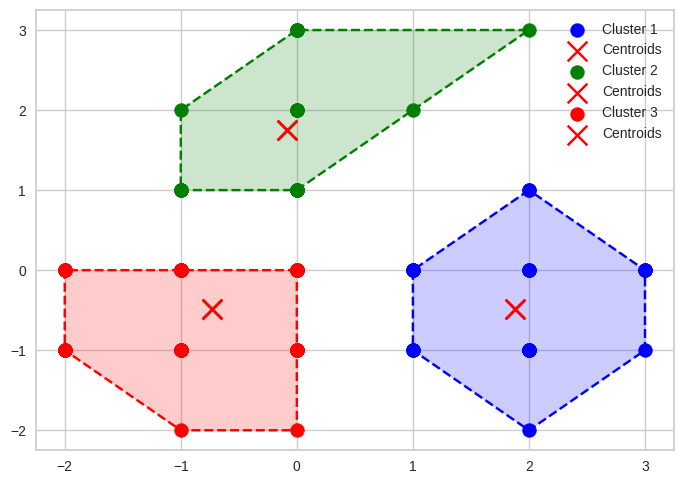

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

# Define the range of cluster numbers to create
# ncluster = range(2, 9)

# for i, n_clusters in enumerate(ncluster):
def drawclusters(ax):
            # for i, n_clusters in enumerate(ncluster):
    for i in range(ncluster):
        points = PCA_arr[y == i]
        ax.scatter(points[:, 0], points[:, 1], s=100, c=col[i], label=f'Cluster {i + 1}')
        hull = ConvexHull(points)
        vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
        ax.plot(points[vert, 0], points[vert, 1], '--', c=col[i])
        ax.fill(points[vert, 0], points[vert, 1], c=col[i], alpha=0.2)
        ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='x')



col = ['blue', 'green', "red", "c", "yellow", "m", "k","violet"]
ncluster = 3

kmeans = KMeans(n_clusters=ncluster, max_iter=500).fit(PCA_arr)
y = kmeans.labels_
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(1, figsize=(7, 5))
drawclusters(ax)
ax.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

QhullError: ignored

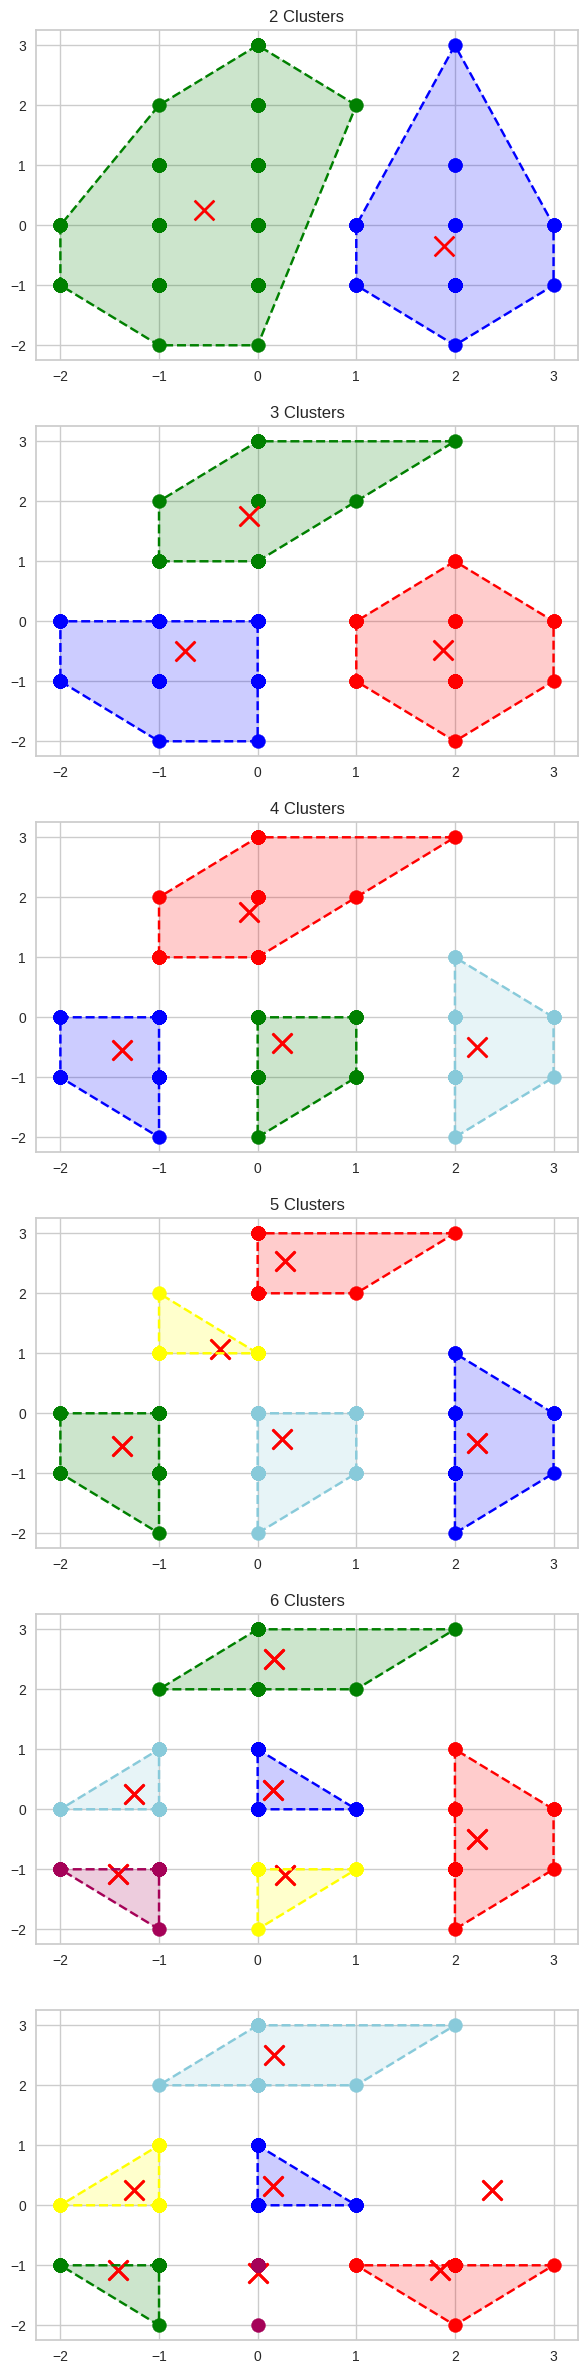

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

# Define the range of cluster numbers to create
ncluster = range(2, 8)



col = ['blue', 'green', "red", "c", "yellow", "m", "k","violet"]

# Create subplots for each number of clusters
fig, axs = plt.subplots(len(ncluster), 1, figsize=(7, 5*len(ncluster)))

# Loop over each number of clusters and create a subplot
for i, n_clusters in enumerate(ncluster):
    # Fit KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, max_iter=500).fit(PCA_arr)
    y = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Call drawclusters to plot the clusters
    def drawclusters(ax):
        for i in range(n_clusters):
            points = PCA_arr[y == i]
            ax.scatter(points[:, 0], points[:, 1], s=100, c=col[i], label=f'Cluster {i + 1}')
            hull = ConvexHull(points)
            vert = np.append(hull.vertices, hull.vertices[0])
            ax.plot(points[vert, 0], points[vert, 1], '--', c=col[i])
            ax.fill(points[vert, 0], points[vert, 1], c=col[i], alpha=0.2)
            ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='x')

    # Call drawclusters on the current subplot
    drawclusters(axs[i])
    axs[i].set_title(f'{n_clusters} Clusters')

# Set legend and layout
plt.tight_layout()
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

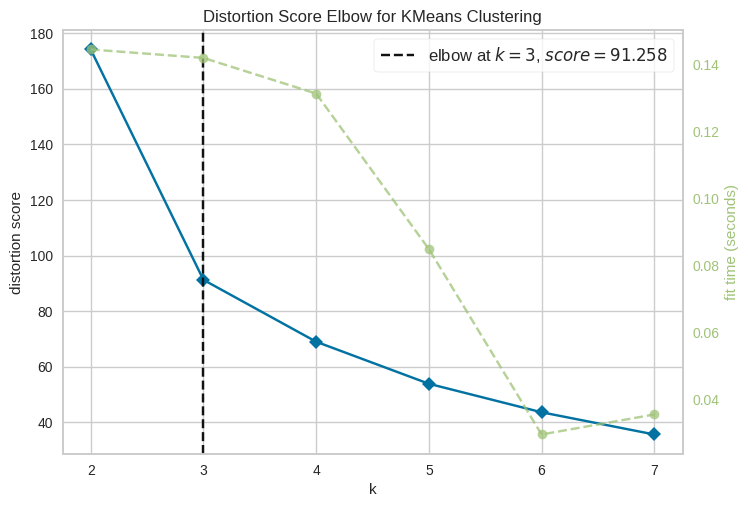

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# Use the elbow method to determine the optimal number of clusters
elbow_visualizer = KElbowVisualizer(kmeans, k=(2,8))
elbow_visualizer.fit(PCA_arr)
elbow_visualizer.show()


**silhouette score/width plot for 2-8 clusters**

In [ ]:
# Use silhouette analysis to evaluate the quality of the clusters
silhouette_visualizer = SilhouetteVisualizer(kmeans)
silhouette_visualizer.fit(feature_set)
silhouette_visualizer.show()

**survival plot and p-values for 2-8 clusters**

In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the survival curve for each cluster
for cluster in merged_data['cluster'].unique():
    cluster_data = merged_data[merged_data['cluster'] == cluster]
    kmf.fit(cluster_data['overall_survival'], event_observed=cluster_data['is_dead'], timeline=cluster_data['overall_survival'], label=f'Cluster {cluster}')

# Print the estimated survival curves
print(kmf.survival_function_)


# Plot the estimated survival curves
ax = kmf.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Survival probability')


# Compare the survival functions between clusters
#results = logrank_test(merged_data['overall_survival'], merged_data['cluster'], merged_data['is_dead'])

# Print the p-value
#print("p-value: ", results.p_value)


In [ ]:
# Add the cluster labels to the original DataFrame
merged_data['cluster'] = cluster_labels
#merged_data.columns
merged_data

**TSNE plot on latent representation**

In [ ]:
# from __future__ import print_function

# from sklearn.manifold import TSNE
# import time


# time_start = time.time()
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(encoded_train)

# tsne.kl_divergence_

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
# import plotly.express as px

# fig = px.scatter(x=tsne_results[:, 0], y=tsne_results[:, 1])
# fig.update_layout(
#     title="t-SNE visualization of latent representation",
#     xaxis_title="First t-SNE",
#     yaxis_title="Second t-SNE",
# )
# fig.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Step 1: Data Collection
# expression_data = pd.read_csv('expression_data.csv')
# dna_sequence_features = pd.read_csv('dna_sequence_features.csv')

# # Step 2: Feature Selection
# correlation_matrix = dna_sequence_features.corr()
# selected_features = correlation_matrix[abs(correlation_matrix['expression']) > 0.5]['expression'].index
# selected_features_data = dna_sequence_features[selected_features]

# # Step 3: Machine Learning
# X_train, X_test, y_train, y_test = train_test_split(selected_features_data, expression_data['expression'], test_size=0.2, random_state=0)

# # Train a random forest regression model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
# rf_model.fit(X_train, y_train)

# # Train a linear regression model
# lin_model = LinearRegression()
# lin_model.fit(X_train, y_train)

# # Step 4: Model Evaluation
# # Evaluate the random forest model
# rf_predictions = rf_model.predict(X_test)
# rf_mse = mean_squared_error(y_test, rf_predictions)
# rf_r2 = r2_score(y_test, rf_predictions)

# # Evaluate the linear regression model
# lin_predictions = lin_model.predict(X_test)
# lin_mse = mean_squared_error(y_test, lin_predictions)
# lin_r2 = r2_score(y_test, lin_predictions)

# print("Random Forest: MSE = {:.2f}, R-squared = {:.2f}".format(rf_mse, rf_r2))
# print("Linear Regression: MSE = {:.2f}, R-squared = {:.2f}".format(lin_mse, lin_r2))
